In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20230101&end_date=20230901&station=9414290&product=hourly_height&datum=MLLW&time_zone=lst&units=metric&application=DataAPI_Sample&format=csv')
data.index = pd.to_datetime(data['Date Time'], format="%Y-%m-%d %H:%M")
print(data.head())
print(data.shape)

                            Date Time   Water Level   Sigma   I   L 
Date Time                                                           
2023-01-01 00:00:00  2023-01-01 00:00         0.798   0.039   0    0
2023-01-01 01:00:00  2023-01-01 01:00         0.801   0.044   0    0
2023-01-01 02:00:00  2023-01-01 02:00         0.955   0.046   0    0
2023-01-01 03:00:00  2023-01-01 03:00         1.152   0.043   0    0
2023-01-01 04:00:00  2023-01-01 04:00         1.440   0.032   0    0
(5080, 5)


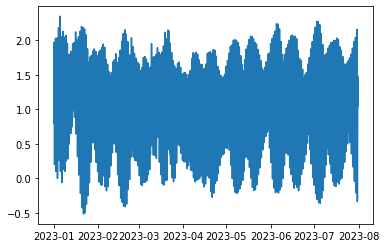

In [3]:
water_level = data[' Water Level']
plt.figure()
plt.plot(water_level)
plt.show()

In [8]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [9]:
WINDOW_SIZE = 10
X, y = df_to_X_y(water_level, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(5070, 10, 1)
(5070,)


In [10]:
X_train, y_train = X[:4000], y[:4000]
X_val, y_val = X[4000:4500], y[4000:4500]
X_test, y_test = X[4500:], y[4500:]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4000, 10, 1) (4000,)
(500, 10, 1) (500,)
(570, 10, 1) (570,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [14]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, callbacks = [cp])

2023-09-07 10:58:21.194816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
125/125 [==============================] - 4s 14ms/step - loss: 0.4738 - root_mean_squared_error: 0.6883 - val_loss: 0.3547 - val_root_mean_squared_error: 0.5956


2023-09-07 10:58:28.109610: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
125/125 [==============================] - 1s 9ms/step - loss: 0.2830 - root_mean_squared_error: 0.5320 - val_loss: 0.2990 - val_root_mean_squared_error: 0.5468


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.2389 - root_mean_squared_error: 0.4888 - val_loss: 0.2446 - val_root_mean_squared_error: 0.4946


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
125/125 [==============================] - 1s 9ms/step - loss: 0.1932 - root_mean_squared_error: 0.4395 - val_loss: 0.1840 - val_root_mean_squared_error: 0.4290


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
125/125 [==============================] - 1s 12ms/step - loss: 0.1426 - root_mean_squared_error: 0.3776 - val_loss: 0.1222 - val_root_mean_squared_error: 0.3496


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1029 - root_mean_squared_error: 0.3208 - val_loss: 0.0870 - val_root_mean_squared_error: 0.2949


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0781 - root_mean_squared_error: 0.2794 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2594


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0573 - root_mean_squared_error: 0.2393 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2260


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0389 - root_mean_squared_error: 0.1973 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1891


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0266 - root_mean_squared_error: 0.1632 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1674


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

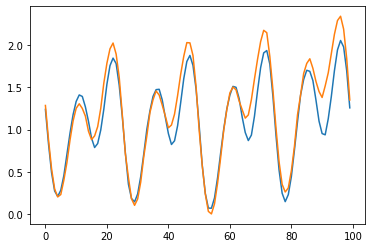

In [30]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Train Actuals':y_train})
plt.figure()
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Train Actuals'][:100])
plt.show()

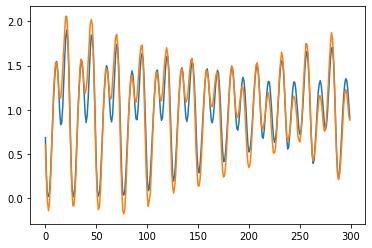

In [33]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Val Actuals':y_val})
plt.figure()
plt.plot(val_results['Val Predictions'][:300])
plt.plot(val_results['Val Actuals'][:300])
plt.show()

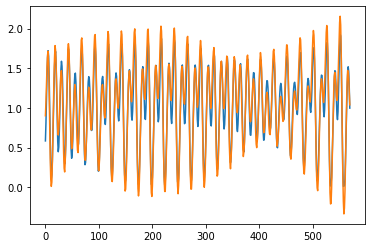

In [35]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Test Actuals':y_test})
plt.figure()
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Test Actuals'])
plt.show()